In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

In [2]:
from glob import glob
file_list=glob("D:/jupyter notebook/10 samples/*.wav")
for i,file in enumerate(file_list):
    print(f'{i}:{file}')

0:D:/jupyter notebook/10 samples\sample01.wav
1:D:/jupyter notebook/10 samples\sample02.wav
2:D:/jupyter notebook/10 samples\sample03.wav
3:D:/jupyter notebook/10 samples\sample04.wav
4:D:/jupyter notebook/10 samples\sample05.wav
5:D:/jupyter notebook/10 samples\sample06.wav
6:D:/jupyter notebook/10 samples\sample07.wav
7:D:/jupyter notebook/10 samples\sample08.wav
8:D:/jupyter notebook/10 samples\sample09.wav
9:D:/jupyter notebook/10 samples\sample10.wav


In [3]:
import IPython.display as ipd
ipd.Audio(file_list[2])

In [4]:
fox, sr = librosa.load(file_list[0], sr=None)
s, sr = librosa.load(file_list[1], sr=None)
p, sr = librosa.load(file_list[2], sr=None)

In [5]:
filter_banks=librosa.filters.mel(n_fft=2048,sr=sr,n_mels=10)

In [6]:
filter_banks.shape

(10, 1025)

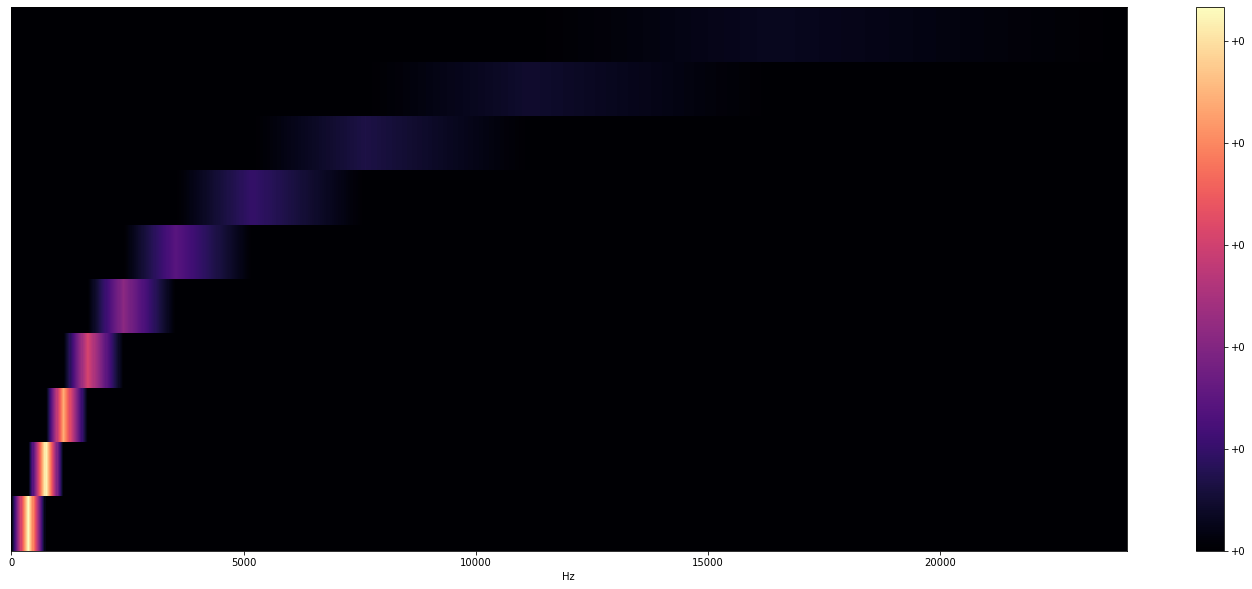

In [8]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [10]:
mel_spectrogram=librosa.feature.melspectrogram(y=fox,sr=sr,n_fft=2048,hop_length=512,n_mels=10)

In [11]:
mel_spectrogram.shape

(10, 469)

In [12]:
log_mel_spectrogram=librosa.power_to_db(mel_spectrogram)

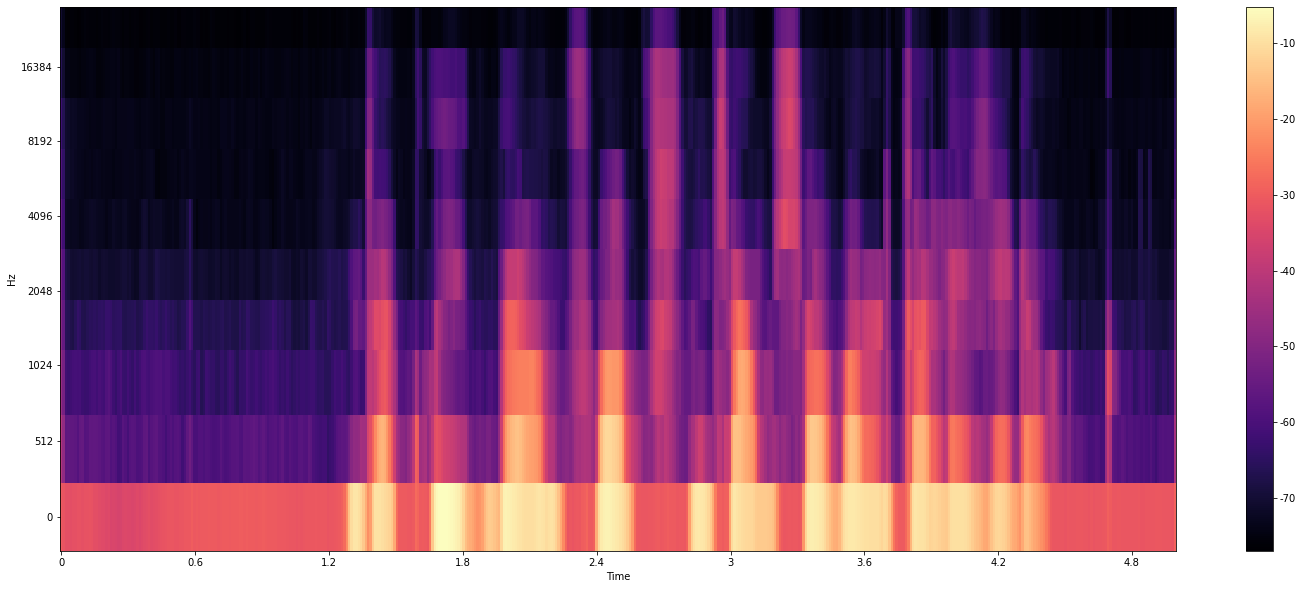

In [13]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                         sr=sr,
                         x_axis="time",
                         y_axis="mel")
plt.colorbar(format="%+2.f")
plt.show()

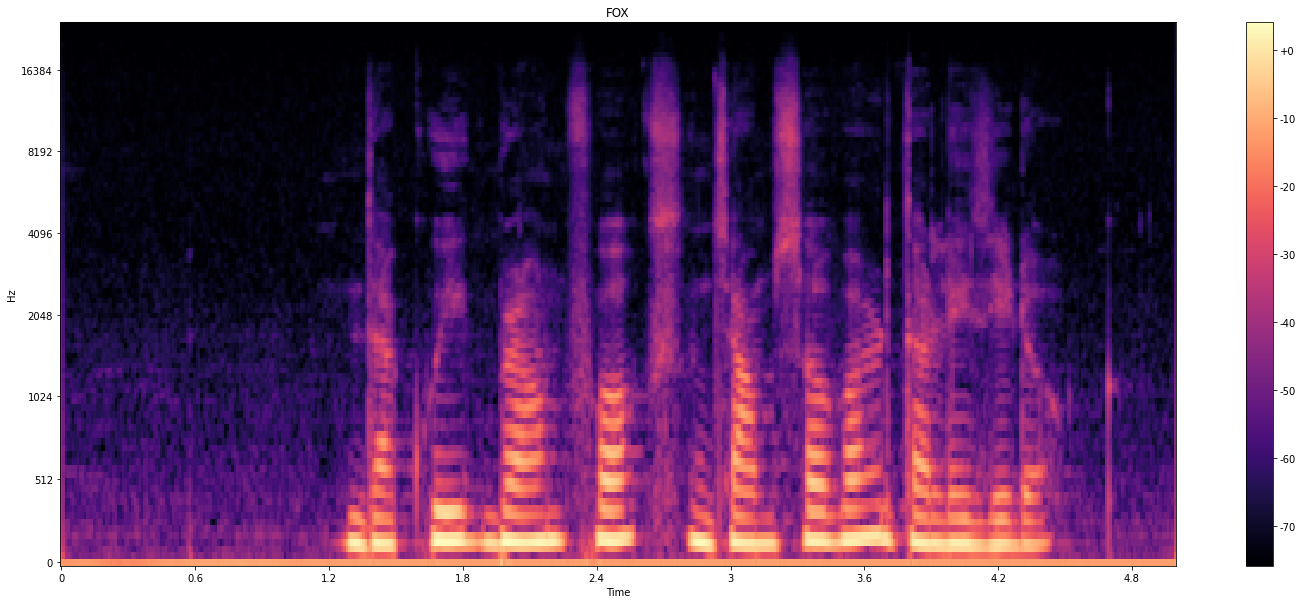

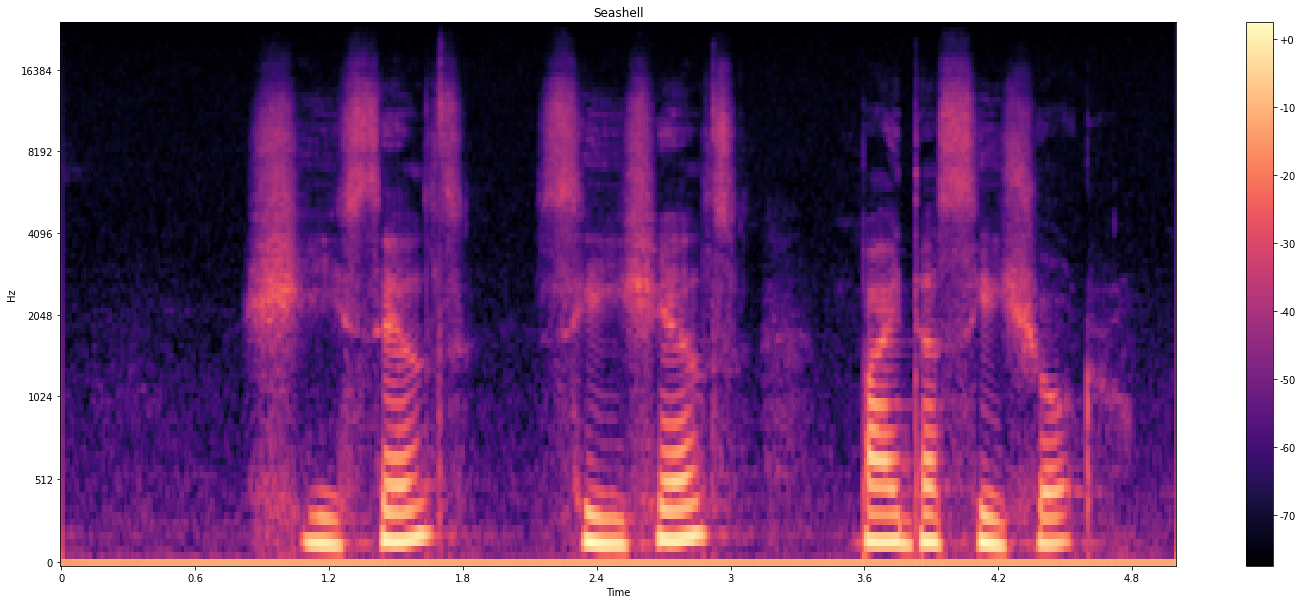

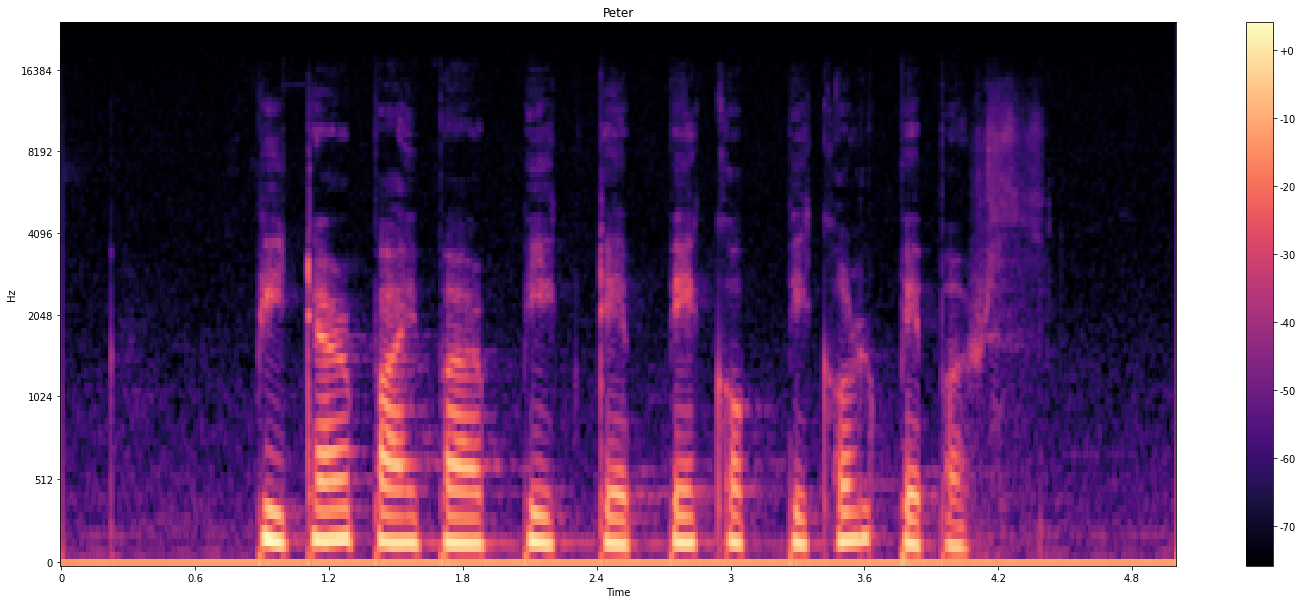

In [18]:
mel_spectrogram_f=librosa.feature.melspectrogram(y=fox,sr=sr,n_fft=2048,hop_length=512,n_mels=100)
mel_spectrogram_s=librosa.feature.melspectrogram(y=s,sr=sr,n_fft=2048,hop_length=512,n_mels=100)
mel_spectrogram_p=librosa.feature.melspectrogram(y=p,sr=sr,n_fft=2048,hop_length=512,n_mels=100)

log_mel_spectrogram_f=librosa.power_to_db(mel_spectrogram_f)
log_mel_spectrogram_s=librosa.power_to_db(mel_spectrogram_s)
log_mel_spectrogram_p=librosa.power_to_db(mel_spectrogram_p)

plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram_f,
                         sr=sr,
                         x_axis="time",
                         y_axis="mel",
                         )
plt.colorbar(format="%+2.f")
plt.title("FOX")
plt.show()
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram_s,
                         sr=sr,
                         x_axis="time",
                         y_axis="mel")
plt.colorbar(format="%+2.f")
plt.title("Seashell")
plt.show()
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram_p,
                         sr=sr,
                         x_axis="time",
                         y_axis="mel")
plt.colorbar(format="%+2.f")
plt.title("Peter")
plt.show()

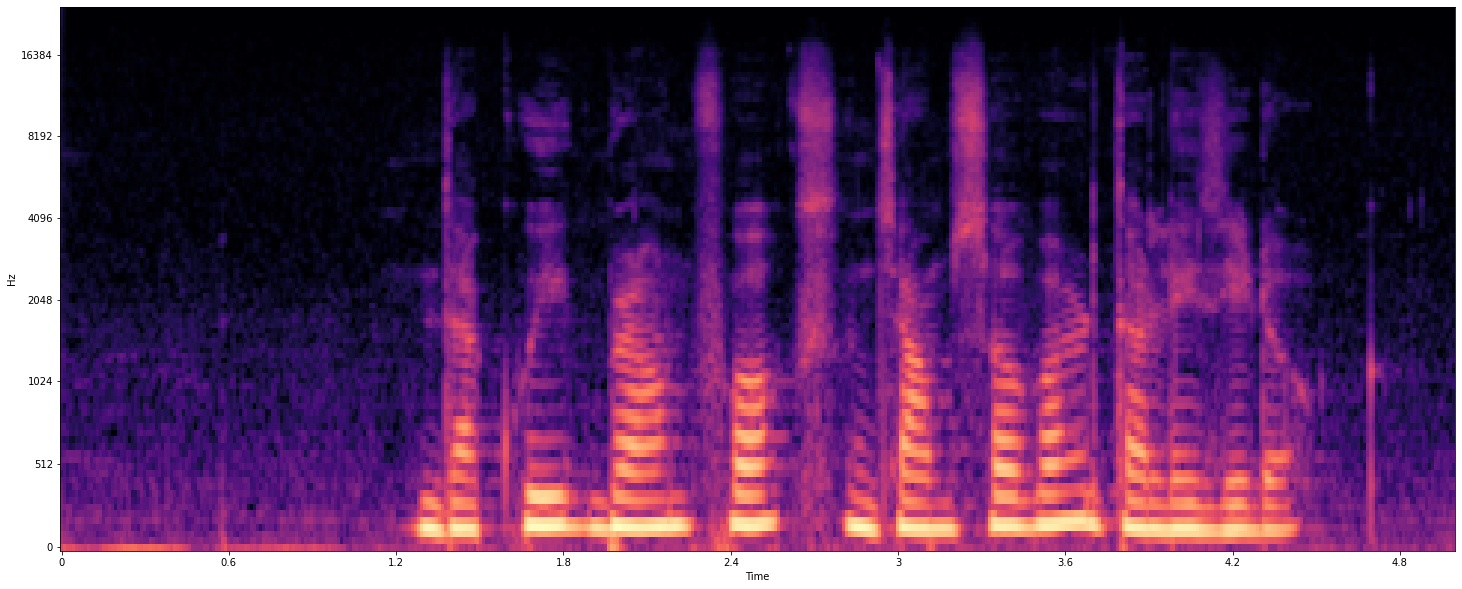

In [19]:
fox_centered = fox - np.mean(fox)
mel_spectrogram_f=librosa.feature.melspectrogram(y=fox_centered,sr=sr,n_fft=2048,hop_length=512,n_mels=100)
log_mel_spectrogram_f=librosa.power_to_db(mel_spectrogram_f)
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram_f,
                         sr=sr,
                         x_axis="time",
                         y_axis="mel",
                         )

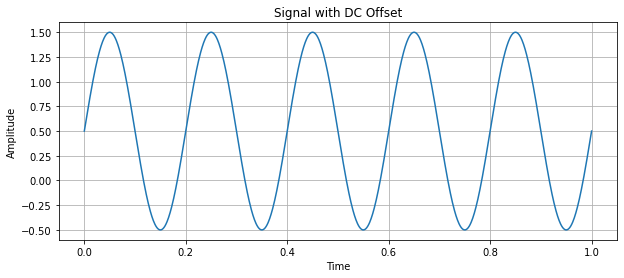

In [26]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)  # Time vector
frequency = 5  # Frequency of the sine wave (in Hz)
amplitude = 1  # Amplitude of the sine wave
dc_offset = 0.5  # DC offset
signal_with_offset = amplitude * np.sin(2 * np.pi * frequency * t) + dc_offset

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal_with_offset)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal with DC Offset')
plt.grid(True)
plt.show()


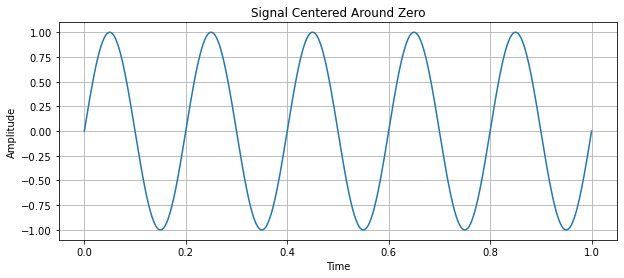

In [27]:
signal_centered = signal_with_offset - np.mean(signal_with_offset)
plt.figure(figsize=(10, 4))
plt.plot(t, signal_centered)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal Centered Around Zero')
plt.grid(True)
plt.show()


In [28]:
signal_without_offset = amplitude * np.sin(2 * np.pi * frequency * t)
signal_with_offset = signal_without_offset + dc_offset

In [30]:
mean_without_offset = np.mean(signal_without_offset)
mean_with_offset = np.mean(signal_with_offset)

In [31]:
print("Mean value without DC offset:", mean_without_offset)
print("Mean value with DC offset:", mean_with_offset)

Mean value without DC offset: -2.1316282072803006e-17
Mean value with DC offset: 0.5
